In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df = pd.read_csv('../data/all_agricultural_products_data.csv')
print(df.head())
print(df.info())

  ticker commodity        date   open   high    low  close  volume
0   CC=F     Cocoa  2000-01-03  840.0  846.0  820.0  830.0    2426
1   CC=F     Cocoa  2000-01-04  830.0  841.0  823.0  836.0    1957
2   CC=F     Cocoa  2000-01-05  840.0  850.0  828.0  831.0    3975
3   CC=F     Cocoa  2000-01-06  830.0  847.0  824.0  841.0    3454
4   CC=F     Cocoa  2000-01-07  848.0  855.0  836.0  853.0    5008
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30931 entries, 0 to 30930
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ticker     30931 non-null  object 
 1   commodity  30931 non-null  object 
 2   date       30931 non-null  object 
 3   open       30931 non-null  float64
 4   high       30931 non-null  float64
 5   low        30931 non-null  float64
 6   close      30931 non-null  float64
 7   volume     30931 non-null  int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 1.9+ MB
None


In [51]:
df["date"] = pd.to_datetime(df["date"])

In [52]:
# Missing values are checked for each column
print("Missing values:\n", df.isna().sum())

Missing values:
 ticker       0
commodity    0
date         0
open         0
high         0
low          0
close        0
volume       0
dtype: int64


In [53]:
#average closing price for each commodity across all available data.
avg_close_by_commodity = df.groupby("commodity")["close"].mean()
print(avg_close_by_commodity)

commodity
Cocoa                   2364.536907
Coffee                   130.917900
Cotton                    71.824317
Orange Juice             249.909730
Random Length Lumber     355.762345
Sugar                     14.865529
Name: close, dtype: float64


In [54]:
#the highest recorded daily high price for the commodity Cocoa.
max_high_cocoa = df[df["commodity"] == "Cocoa"]["high"].max()
print(f"Max High Price for Cocoa: {max_high_cocoa}")

Max High Price for Cocoa: 12261.0


In [55]:
#the average trading volume (number of units traded) for each commodity.
avg_volume_by_commodity = df.groupby("commodity")["volume"].mean()
print(avg_volume_by_commodity)

commodity
Cocoa                    8074.828255
Coffee                   9385.190903
Cotton                   8053.104140
Orange Juice              654.181818
Random Length Lumber      423.951774
Sugar                   45613.206331
Name: volume, dtype: float64


In [56]:
# the top 10 days with the highest closing prices across all commodities.
top_close_days = df.nlargest(10, "close")[["date", "commodity", "close"]]
print(top_close_days)

           date commodity    close
6092 2024-04-19     Cocoa  11878.0
6091 2024-04-18     Cocoa  11311.0
6093 2024-04-22     Cocoa  11166.0
6095 2024-04-24     Cocoa  11043.0
6088 2024-04-15     Cocoa  11001.0
6096 2024-04-25     Cocoa  10988.0
6087 2024-04-12     Cocoa  10987.0
6130 2024-06-13     Cocoa  10810.0
6097 2024-04-26     Cocoa  10729.0
6094 2024-04-23     Cocoa  10584.0


In [57]:
#The year from the date and the average closing price for Cocoa for each year.
df["year"] = df["date"].dt.year
avg_close_by_year_cocoa = df[df["commodity"] == "Cocoa"].groupby("year")["close"].mean()
print(avg_close_by_year_cocoa)

year
2000     793.272000
2001    1032.702041
2002    1718.060241
2003    1746.710843
2004    1504.522088
2005    1473.155378
2006    1502.272000
2007    1882.485944
2008    2558.047431
2009    2798.583333
2010    2942.234127
2011    2921.007968
2012    2347.616000
2013    2405.242063
2014    3008.138889
2015    3092.686508
2016    2855.072000
2017    2005.402390
2018    2309.896414
2019    2386.126984
2020    2515.671937
2021    2493.444444
2022    2458.673307
2023    3312.952191
2024    7826.908333
Name: close, dtype: float64


In [58]:
#the daily price volatility by subtracting the low from the high price and averaging it per commodity.
df["daily_range"] = df["high"] - df["low"]
avg_range_by_commodity = df.groupby("commodity")["daily_range"].mean()
print(avg_range_by_commodity)

commodity
Cocoa                   50.546684
Coffee                   3.160262
Cotton                   1.538825
Orange Juice             6.975639
Random Length Lumber    10.306569
Sugar                    0.422083
Name: daily_range, dtype: float64


In [59]:
#the trading volume for each year across all commodities.
total_volume_by_year = df.groupby("year")["volume"].sum()
print(total_volume_by_year)

year
2000     5447649
2001     5187303
2002     6139244
2003     6994618
2004     9194782
2005    11034504
2006    12199455
2007    16966448
2008    18310922
2009    16657028
2010    18019307
2011    16216394
2012    17850807
2013    21657263
2014    21146141
2015    24787046
2016    24125348
2017    24046130
2018    27514838
2019    26869306
2020    24024653
2021    21240979
2022    24087884
2023    25456987
2024    12353332
Name: volume, dtype: int64


In [60]:
#the lowest price reached on any day during the year 2022.
min_low_2022 = df[df["year"] == 2022]["low"].min()
print(f"Min Low Price in 2022: {min_low_2022}")

Min Low Price in 2022: 17.200000762939453


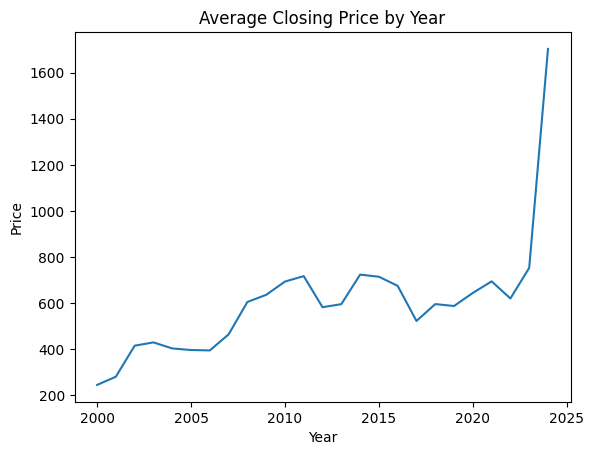

In [61]:
df.groupby("year")["close"].mean().plot(kind="line")
plt.title("Average Closing Price by Year")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

In [62]:
#how many unique trading days exist for each commodity.
trading_days_by_commodity = df.groupby("commodity")["date"].nunique()
print(trading_days_by_commodity)

commodity
Cocoa                   6137
Coffee                  6134
Cotton                  6136
Orange Juice             704
Random Length Lumber    5723
Sugar                   6097
Name: date, dtype: int64


In [63]:
#average opening price for Cocoa during the year 2020.
avg_open_cocoa_2020 = df[(df["commodity"] == "Cocoa") & (df["year"] == 2020)]["open"].mean()
print(f"Avg Open Price for Cocoa in 2020: {avg_open_cocoa_2020:.2f}")

Avg Open Price for Cocoa in 2020: 2515.76


In [64]:
#the highest closing price recorded in each year.
max_close_by_year = df.groupby("year")["close"].max()
print(max_close_by_year)

year
2000      903.0
2001     1355.0
2002     2374.0
2003     2409.0
2004     1806.0
2005     1844.0
2006     1729.0
2007     2246.0
2008     3360.0
2009     3498.0
2010     3461.0
2011     3774.0
2012     2744.0
2013     2821.0
2014     3371.0
2015     3410.0
2016     3235.0
2017     2262.0
2018     2914.0
2019     2766.0
2020     3054.0
2021     2785.0
2022     2786.0
2023     4475.0
2024    11878.0
Name: close, dtype: float64


In [65]:
#the daily percentage change between open and close prices, then averages it by commodity.
df["daily_change_pct"] = ((df["close"] - df["open"]) / df["open"]) * 100
avg_change_by_commodity = df.groupby("commodity")["daily_change_pct"].mean()
print(avg_change_by_commodity)

commodity
Cocoa                   0.004834
Coffee                 -0.072775
Cotton                 -0.065604
Orange Juice            0.162737
Random Length Lumber   -0.083133
Sugar                  -0.022160
Name: daily_change_pct, dtype: float64


In [66]:
#total trading volume for the Cocoa commodity across all available years.
total_volume_cocoa = df[df["commodity"] == "Cocoa"]["volume"].sum()
print(f"Total Volume for Cocoa: {total_volume_cocoa}")

Total Volume for Cocoa: 49555221


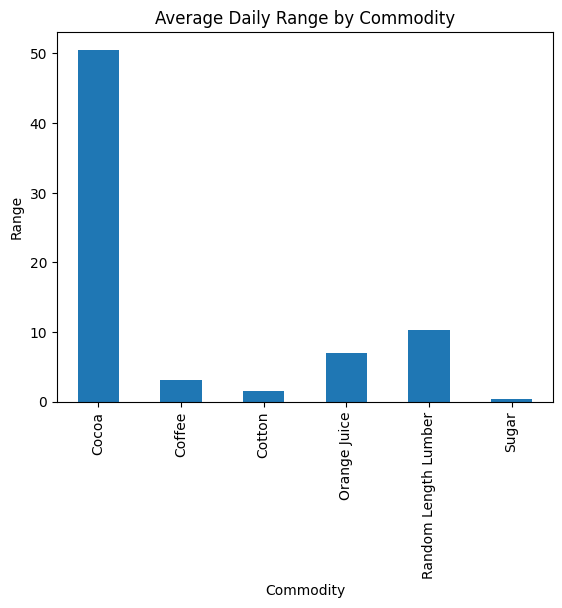

In [67]:
df.groupby("commodity")["daily_range"].mean().plot(kind="bar")
plt.title("Average Daily Range by Commodity")
plt.xlabel("Commodity")
plt.ylabel("Range")
plt.show()

In [68]:
#the top 10 days with the highest trading volume, along with date and commodity.
top_volume_days = df.nlargest(10, "volume")[["date", "commodity", "volume"]]
print(top_volume_days)

            date commodity  volume
26798 2008-01-18     Sugar  232949
28245 2013-10-18     Sugar  206685
29476 2018-09-12     Sugar  194351
26799 2008-01-22     Sugar  178674
29832 2020-02-12     Sugar  178421
30794 2023-12-06     Sugar  177202
26797 2008-01-17     Sugar  173837
30791 2023-12-01     Sugar  170625
28218 2013-09-11     Sugar  169644
30627 2023-04-11     Sugar  169537


In [69]:
#average closing price per year for the most recent 5 years (from 2018 onward).
recent_avg_close = df[df["year"] >= 2018].groupby("year")["close"].mean()
print(recent_avg_close)

year
2018     595.745450
2019     587.514056
2020     644.244071
2021     694.359225
2022     620.152749
2023     752.735612
2024    1702.982317
Name: close, dtype: float64


In [70]:
#the lowest closing price recorded for each commodity.
min_close_by_commodity = df.groupby("commodity")["close"].min()
print(min_close_by_commodity)

commodity
Cocoa                   674.000000
Coffee                   41.500000
Cotton                   28.520000
Orange Juice            115.000000
Random Length Lumber    138.100006
Sugar                     4.960000
Name: close, dtype: float64


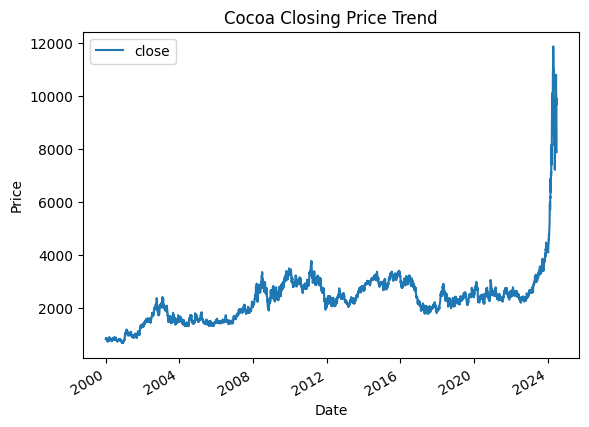

In [71]:
df[df["commodity"] == "Cocoa"].plot(x="date", y="close", kind="line")
plt.title("Cocoa Closing Price Trend")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

In [72]:
#how many days the closing price was higher than the opening price.
up_days = len(df[df["close"] > df["open"]])
print(f"Number of Days with Close > Open: {up_days}")

Number of Days with Close > Open: 14135


In [73]:
#average closing price per quarter for each year.
df["quarter"] = df["date"].dt.quarter
avg_close_by_quarter = df.groupby(["year", "quarter"])["close"].mean()
print(avg_close_by_quarter)

year  quarter
2000  1           291.480047
      2           243.303690
      3           236.004918
      4           223.647042
2001  1           271.466065
                    ...     
2023  2           699.772235
      3           809.752666
      4           929.157844
2024  1          1356.201672
      2          2061.518238
Name: close, Length: 98, dtype: float64


In [74]:
#the highest daily high price for each commodity.
max_high_by_commodity = df.groupby("commodity")["high"].max()
print(max_high_by_commodity)

commodity
Cocoa                   12261.000000
Coffee                    306.250000
Cotton                    227.000000
Orange Juice              495.250000
Random Length Lumber     1711.199951
Sugar                      36.080002
Name: high, dtype: float64


In [75]:
#the daily volatility as a percentage of the closing price, then averages it by commodity.
df["volatility_pct"] = (df["daily_range"] / df["close"]) * 100
avg_volatility_by_commodity = df.groupby("commodity")["volatility_pct"].mean()
print(avg_volatility_by_commodity)

commodity
Cocoa                   2.056347
Coffee                  2.406265
Cotton                  2.092164
Orange Juice            2.752048
Random Length Lumber    2.708537
Sugar                   2.775653
Name: volatility_pct, dtype: float64


In [76]:
#the sum of trading volume during the year 2022 across all commodities.
total_volume_2022 = df[df["year"] == 2022]["volume"].sum()
print(f"Total Volume in 2022: {total_volume_2022}")

Total Volume in 2022: 24087884


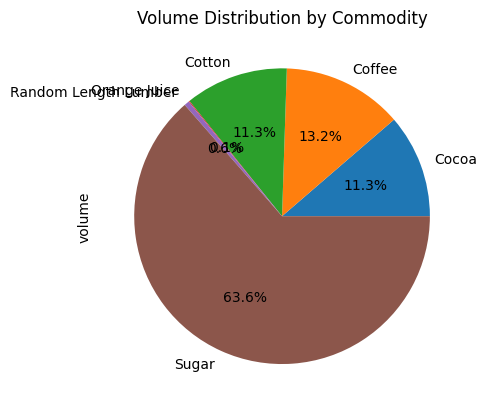

In [77]:
df.groupby("commodity")["volume"].sum().plot(kind="pie", autopct='%1.1f%%')
plt.title("Volume Distribution by Commodity")
plt.show()

In [78]:
#the maximum closing price for each year from 2013 onwards.
recent_max_close = df[df["year"] >= 2013].groupby("year")["close"].max()
print(recent_max_close)

year
2013     2821.0
2014     3371.0
2015     3410.0
2016     3235.0
2017     2262.0
2018     2914.0
2019     2766.0
2020     3054.0
2021     2785.0
2022     2786.0
2023     4475.0
2024    11878.0
Name: close, dtype: float64


In [79]:
#number of days when the closing price was lower than the opening price.
down_days = len(df[df["close"] < df["open"]])
print(f"Number of Days with Close < Open: {down_days}")

Number of Days with Close < Open: 15121


In [80]:
#average daily price range for each year from 2018 to 2022.
recent_range = df[df["year"] >= 2018].groupby("year")["daily_range"].mean()
print(recent_range)

year
2018    13.174104
2019    10.881968
2020    13.503739
2021    16.410947
2022    14.188613
2023    13.560564
2024    83.817716
Name: daily_range, dtype: float64


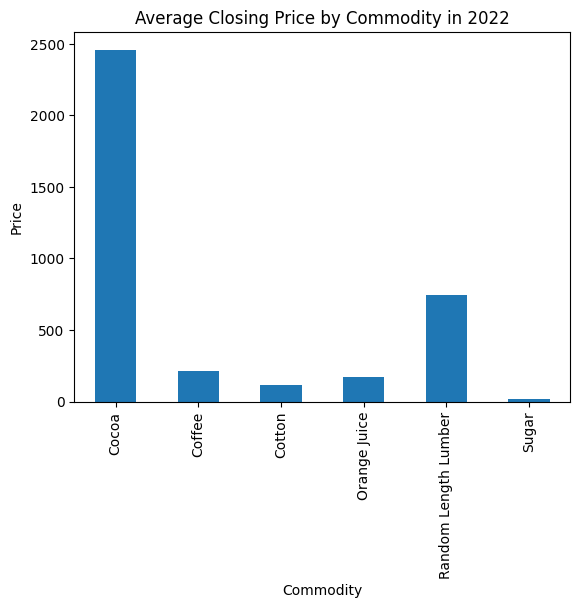

In [81]:
df[df["year"] == 2022].groupby("commodity")["close"].mean().plot(kind="bar")
plt.title("Average Closing Price by Commodity in 2022")
plt.xlabel("Commodity")
plt.ylabel("Price")
plt.show()

In [82]:
#average closing price for the months of January and February in each year.
jan_feb_avg_close = df[df["date"].dt.month.isin([1, 2])].groupby("year")["close"].mean()
print(jan_feb_avg_close)

year
2000     322.808917
2001     267.523650
2002     349.988250
2003     514.722538
2004     412.905131
2005     419.036051
2006     408.420153
2007     420.998163
2008     554.915854
2009     589.208974
2010     736.007895
2011     798.032813
2012     577.194550
2013     563.941949
2014     685.867700
2015     689.452410
2016     662.323692
2017     536.576051
2018     543.697150
2019     569.123900
2020     676.342150
2021     733.650893
2022     714.258462
2023     591.948846
2024    1163.163708
Name: close, dtype: float64


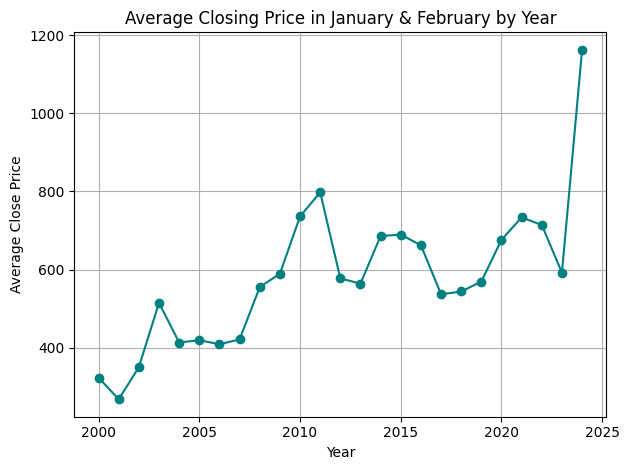

In [83]:
jan_feb_avg_close.plot(kind="line", marker='o', color='teal')
plt.title("Average Closing Price in January & February by Year")
plt.xlabel("Year")
plt.ylabel("Average Close Price")
plt.grid(True)
plt.tight_layout()
plt.show()

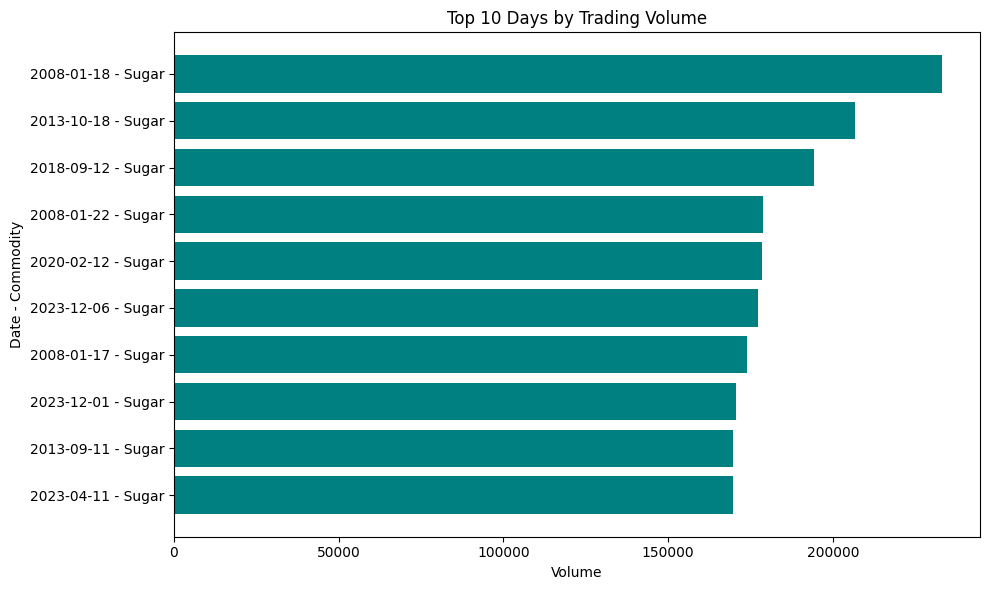

In [84]:
plt.figure(figsize=(10, 6))
plt.barh(labels, top_volume_days["volume"], color="teal")
plt.title("Top 10 Days by Trading Volume")
plt.xlabel("Volume")
plt.ylabel("Date - Commodity")
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()